# Epsilon-Greedy Policy

In [1]:
import gym
import gym_bandits
import numpy as np

In [2]:
env = gym.make('BanditTwoArmedHighLowFixed-v0')

In [3]:
print(env.p_dist)

[0.8, 0.2]


In [25]:
count = np.zeros(2)

In [26]:
sum_rewards = np.zeros(2)

In [27]:
Q = np.zeros(2)

In [28]:
Q

array([0., 0.])

In [29]:
num_rounds = 100

### Defining the Epsilon-Greedy Method

In [30]:
def epsilon_greedy(epsilon):
    
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(Q)

### Start Pulling the Arm

In [31]:
for i in range(num_rounds):
    
    # select the arm based on the epsilon-greedy method
    arm = epsilon_greedy(0.5)
    
    # pull the arm and store the reward and next state information
    next_state, reward, done, info = env.step(arm)
    
    # increment the count of the arm by 1
    count[arm] = count[arm] + 1
    
    # update the sum of rewards
    sum_rewards[arm] = sum_rewards[arm] + reward
    
    # update the average reward of the arm
    Q[arm] = sum_rewards[arm] / count[arm]
    
    

In [32]:
print(Q)

[0.83561644 0.22222222]


In [33]:
print(f'The optimal arm is arm {np.argmax(Q) + 1}')

The optimal arm is arm 1


# Softmax Eploration

In [34]:
import gym
import gym_bandits
import numpy as np

In [35]:
env = gym.make("BanditTwoArmedHighLowFixed-v0")

In [36]:
print(env.p_dist)

[0.8, 0.2]


In [37]:
count = np.zeros(2)

In [38]:
sum_rewards = np.zeros(2)

In [39]:
Q = np.zeros(2)

In [40]:
num_rounds = 100

### Defining the Softmax Exploration Function

Now, let's define the softmax function with temperature `T` as:

$$P_t(a) = \frac{\text{exp}(Q_t(a)/T)} {\sum_{i=1}^n \text{exp}(Q_t(i)/T)} $$

In [41]:
def softmax(T):
    
    # compute the probability of each arm based on the above equation
    denom = sum([np.exp(i/T) for i in Q])
    probs = [np.exp(i/T)/denom for i in Q]
    
    # select the arm based on the computed probability distribution of arms
    arm = np.random.choice(env.action_space.n, p=probs)
    
    return arm

### Start Pulling the Arm

In [42]:
T = 50

In [43]:
for i in range(num_rounds):
    
    # select the arm based on the softmax eploration method
    arm = softmax(T)
    
    # pull the arm and store the reward and next state information
    next_state, reward, done, info = env.step(arm)
    
    # increment the count of the arm by 1
    count[arm] = count[arm] + 1
    
    # update the sum of rewards of the arm
    sum_rewards[arm] = sum_rewards[arm] + reward
    
    # update the average reward of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
    
    # reduce the temprature 
    T = T * 0.99
    

In [44]:
print(Q)

[0.87755102 0.17647059]


In [45]:
print(f'The optimal arm is arm {np.argmax(Q)+1}')

The optimal arm is arm 1


# Upper Confidence Bound

In [46]:
import gym
import gym_bandits
import numpy as np

In [47]:
env = gym.make("BanditTwoArmedHighLowFixed-v0")

In [48]:
print(env.p_dist)

[0.8, 0.2]


In [49]:
count = np.zeros(2)

In [50]:
sum_rewards = np.zeros(2)

In [51]:
Q = np.zeros(2)

In [52]:
num_rounds = 100

### Defining the Upper Confidence Bound

$$ \text{UCB(a)} =Q(a) +\sqrt{\frac{2 \log(t)}{N(a)}}  --- (1) $$

In [53]:
def UCB(i):
    
    # initialize the numpy array for storing the UCB of all the arms
    ucb = np.zeros(2)
    
    # before computing the UCB, we explore all the arms at least once, so for the first 2 rounds,
    # we directly select the arm corresponding to the round number
    
    if i < 2:
        return i
    
    # if the round is greater than 1 then, we compute the UCB of all the arms as specified in the
    # equation(1) and return the arm which has the highest the UCB
    
    else:
        for arm in range(2):
            ucb[arm] = Q[arm] + np.sqrt((2*np.log(sum(count))) / count[arm])
        return (np.argmax(ucb))

### Start Playing

In [54]:
for i in range(num_rounds):
    
    # select the arm based on the UCB method
    arm = UCB(i)
    
    # pull the arm and store the reward and next state information
    next_state, reward, done, info = env.step(arm)
    
    # increment the count of the arm by 1
    count[arm] = count[arm] + 1
    
    # update the sum of rewards of the arm
    sum_rewards[arm] = sum_rewards[arm] + reward
    
    # update the average reward of the arm
    Q[arm] = sum_rewards[arm] / count[arm]

In [55]:
print(Q)

[0.8 0.1]


In [56]:
print(f'The optimal arm is arm {np.argmax(Q)+1}')

The optimal arm is arm 1


# Thompson Sampling

In [1]:
import gym
import gym_bandits
import numpy as np

In [24]:
env = gym.make("BanditTwoArmedHighLowFixed-v0")

In [25]:
print(env.p_dist)

[0.8, 0.2]


In [26]:
count = np.zeros(2)

In [27]:
sum_rewards = np.zeros(2)

In [28]:
Q = np.zeros(2)

In [29]:
num_rounds = 100

In [30]:
alpha = np.ones(2)

In [31]:
beta = np.ones(2)

### Defining the Thompson Sampling Function

In [32]:
def thompson_sampling(alpha, beta):
    
    samples = [np.random.beta(alpha[i]+1, beta[i]+1) for i in range(2)]
    
    return np.argmax(samples)

### Start Playing

In [11]:
alpha

array([1., 1.])

In [12]:
alpha+1

array([2., 2.])

In [14]:
np.random.beta(alpha+1, beta+1)

array([0.48188678, 0.75461019])

In [15]:
samples = [np.random.beta(alpha[i]+1, beta[i]+1) for i in range(2)]

In [16]:
samples

[0.3869349537385338, 0.6276719211890108]

In [17]:
np.argmax(samples)

1

In [35]:
for i in range(num_rounds):
    
    # select the arm based on the thompson sampling method
    arm = thompson_sampling(alpha, beta)
    
    # pull the arm and store the reward and next state information
    next_state, reward, done, info = env.step(arm)
    
    # increment the count of the arm by 1
    count[arm] = count[arm] + 1
    
    # update the sum of rewards of the arm
    sum_rewards[arm] = sum_rewards[arm] + reward
    
    # update the average reward of the arm
    Q[arm] = sum_rewards[arm]/count[arm]
    
    # if we win the game, i.e., if the reward is equal to 1, then we update the value of alpha as 
    # alpha = alpha + 1 else we update the value of beta as beta = beta + 1
    if reward==1:
        alpha[arm] = alpha[arm] + 1
    else:
        beta[arm] = beta[arm] + 1
        
    

In [36]:
print(Q)

[0.7755102 0.       ]


In [37]:
print(f'the optimal arm is {np.argmax(Q)+1}')

the optimal arm is 1


In [38]:
count

array([196.,   4.])

# Finding the Best Advertisement Banner using Bandits

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

### Creating a Dataset

In [40]:
df = pd.DataFrame()
for i in range(5):
    df['Banner_type_'+str(i)] = np.random.randint(0, 2, 100000)

In [41]:
df.head()

,Banner_type_0,Banner_type_1,Banner_type_2,Banner_type_3,Banner_type_4
0,1,0,0,0,0
1,1,1,1,0,1
2,1,1,0,0,0
3,1,1,1,1,0
4,1,1,0,1,0


# Initialize the Variables

In [42]:
num_iterations = 100000

In [44]:
num_banner = 5

In [45]:
count = np.zeros(num_banner)

In [46]:
sum_rewards = np.zeros(num_banner)

In [47]:
Q = np.zeros(num_banner)

In [48]:
banner_selected = []

### Define Epislon Greedy Policy

In [49]:
def epsilon_greedy_policy(epsilon):
    
    if np.random.uniform(0, 1) < epsilon:
        return np.random.choice(num_banner)
    else:
        return np.argmax(Q)

In [50]:
# for each iteration
for i in range(num_iterations):
    
    # select the banner using the epsilon greedy policy
    banner = epsilon_greedy_policy(0.5)
    
    # get the reward of the banner
    reward = df.values[i, banner]
    
    # increment the counter
    count[banner] = count[banner] + 1
    
    # store the sum of rewards
    sum_rewards[banner] = sum_rewards[banner] + reward
    
    # compute the average reward
    Q[banner] = sum_rewards[banner]/count[banner]
    
    # store the banner to the banner selected list
    banner_selected.append(banner)

In [51]:
print(f'The optimal banner is banner {np.argmax(Q)}')

The optimal banner is banner 1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


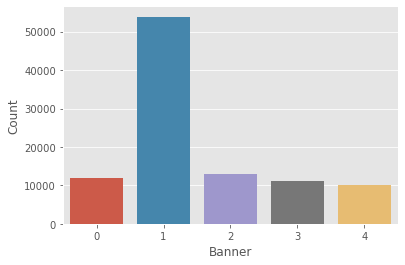

In [57]:
ax = sns.countplot(banner_selected)
ax.set(xlabel='Banner', ylabel='Count')
plt.show()